# Example Stochastic Differential Equations

In this notebook we apply what we learned in the previous notebook to two example SDEs.

---

In [3]:
# Import libraries 
import numpy as np
import matplotlib.pyplot as plt

---

# Bistable system

Consider the SDE:

$$
\dot X(t) = X(t) - X^3(t) + \sigma \xi(t)
$$

This equation describes a bistable system in presence of noise. 

To understand the meaning of this, consider $\sigma = 0$, or equivalently the ODE: $\dot X = X - X^3$. You can easily see that $\dot X = 0$ for $X=0$ and $X=\pm 1$. The points $X=\pm 1$ are stable (like the pendulum at the bottom), while the point $X=0$ is unstable (like the pendulum at the top). $X=0$ divides the phase space. Solutions starting from positive initial conditions, $X_0 > 0$, evolve to $X = 1$, while those with $X_0 < 0$ go to $X = -1$. Since the system has two stable points it is referred to as [bistable](https://en.wikipedia.org/wiki/Bistability).

When noise is included, $\sigma = 0$, the system can make random jumps between the two stable states.  

**Exercises:** In the cell below write Python code to solve the bistable SDE. You should start by copy-pasting the code from "Our first SDE" in the previous notebook. Suggestions:
- Rather than staring all paths with the same initial condition, use the following:
`X0 = np.random.uniform(-2, 2, Npaths)`.
- Try parameters `sigma = 0.5`, `tf = 200`, `Nsteps = 1000`, `Npaths = 3`. You will see that the solutions spend most of their time on one side or the other of $X=0$, but occasionally jump to the other side. 
- Try parameters `sigma = 0.5`, `tf = 20`, `Nsteps = 100`, `Npaths = 1000`. What do you think the histogram of the solutions at the final time will look like?  Not all histograms are Gaussian. Plot a histogram of the solution at the final time. (Use about 31 bins.) Does the histogram agree with what you expect? 
- Repeat the previous item with `sigma = 0.2` (this really shows the bistable character of the system) and `sigma = 1`.

You should not need a model solution, but one is provided at the end of the notebook. 

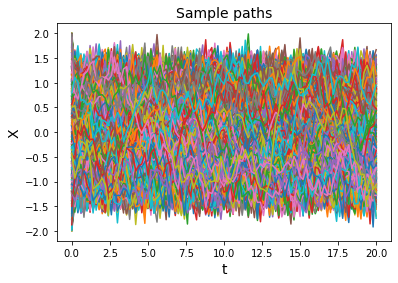

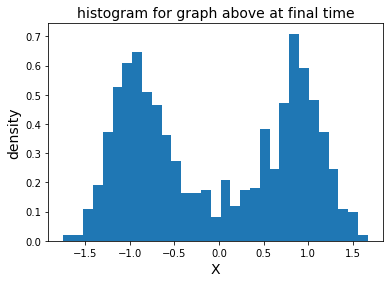

In [11]:
# Time step the SDE: dot X = -mu X + sigma xi, by Euler's method.

# Problem setup. 
# Set model and numerical parameters, and the initial condition.
# These are the lines the user might want to vary.
tf = 20
Nsteps = 100
Npaths = 1000
X0 = np.random.uniform(-2, 2, Npaths)
sigma = 0.5


# Generate the time grid and solution array
t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
X = np.zeros((Nsteps+1,Npaths))
root_dt = np.sqrt(dt)
  
# Time step starting from initial condition
X[0,:] = X0;
for n in range(Nsteps):
    F_of_X = X[n,:] - (X[n,:])**3
    X[n+1,:] =  X[n,:] + dt * F_of_X + sigma * root_dt * np.random.randn(Npaths)

# Plot paths
plt.plot(t,X)
plt.xlabel("t", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("Sample paths", fontsize=14)
plt.show()
 
# Plot histogram
plt.hist(X[-1,:], bins = 31, density=True)
plt.xlabel("X", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.title("histogram for graph above at final time", fontsize=14)
plt.show()

---

# Non-autonomous equation

Consider the non-autonomous SDE:

$$
\dot X(t) = -X^3(t) - 4 \cos^4(\sqrt{t})  + \sigma \xi(t)
$$

There is nothing special about this SDE. It is chosen to illustrate a nice way of showing the statistical behaviour of the solution paths. 

**Exercise:** In the cell below write Python code to solve this SDE. You should start by copy-pasting the code from "Our first SDE" or from the cell above. Run with the following parameter values:
- `tf = 100`, `Nsteps = 1000`, `Npaths = 100`, `sigma = 0.2`.

You should not need a model solution, but one is provided at the end of the notebook. 

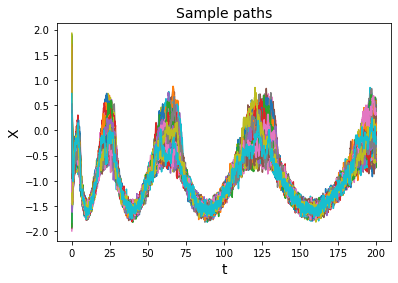

In [12]:
# Time step the SDE: dot X = -X^3 - 4 cos^4(sqrt(t)) + sigma xi, by Euler's method.

# Problem setup. 
# Set model and numerical parameters, and the initial condition.
# These are the lines the user might want to vary.
tf = 200
Nsteps = 2000
Npaths = 100
X0 = np.random.uniform(-2, 2, Npaths)
sigma = 0.2

# Generate the time grid and solution array
t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
X = np.zeros((Nsteps+1,Npaths))
root_dt = np.sqrt(dt)
  
# Time step starting from initial condition
X[0,:] = X0;
for n in range(Nsteps):
    F_of_X = -X[n,:]**3 - 4 * np.cos(t[n]**0.5)**4
    X[n+1,:] =  X[n,:] + dt * F_of_X +  sigma * root_dt * np.random.randn(Npaths)

# Plot paths
plt.plot(t,X)
plt.xlabel("t", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("Sample paths", fontsize=14)
plt.show()

---
### Pretty plot

Matplotlib has a nice function `plt.fill_between` that can be used to plot the mean +/- the standard deviation of all the sample paths as a function of time. It is best to run the example below, and then read the code. This will work if the variable `X` contains the solution to the non-autonomous SDE above.

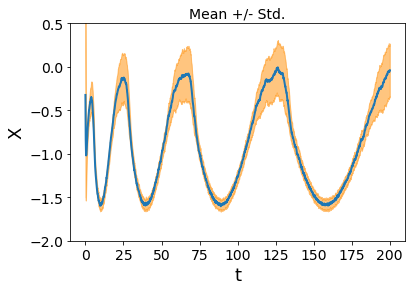

In [13]:
# Pretty plot using fill_between to show mean +/- standard deviation as function of time.

# Compute the mean and standard deviation as function of time
X_mean = np.mean(X,1)
X_std = np.std(X,1)

# Plot shaded region between X_mean - X_std and X_mean + X_std 
plt.fill_between(t, 
                 X_mean - X_std, 
                 X_mean + X_std, 
                 alpha=0.5, color="darkorange")

# Plot the mean itself
plt.plot(t,X_mean, linewidth=2)

# labels
plt.xlabel("t", fontsize=18)
plt.ylabel("X", fontsize=18)
plt.ylim(-2, 0.5)
plt.title("Mean +/- Std.", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

---

This compactly shows the statistical behaviours of the sample paths. One can clearly see the mean of all paths and one can see where the variation between the paths (as measured by the standard deviation) is large. 

---
# Answers 
---

Expand cells to see answers.

In [ ]:
# Time step the SDE: dot X = X - X^3 + sigma xi, by Euler's method.

# Problem setup. 
# Set model and numerical parameters, and the initial condition.
# These are the lines the user might want to vary.
tf = 200
Nsteps = 1000
Npaths = 3
X0 = np.random.uniform(-2, 2, Npaths)
sigma = 0.5

# Generate the time grid and solution array
t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
X = np.zeros((Nsteps+1,Npaths))
root_dt = np.sqrt(dt)
  
# Time step starting from initial condition
X[0,:] = X0;
for n in range(Nsteps):
    F_of_X = X[n,:] - X[n,:]**3
    X[n+1,:] =  X[n,:] + dt * F_of_X + sigma * root_dt * np.random.randn(Npaths)

# Plot paths
plt.plot(t,X)
plt.xlabel("t", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("Sample paths", fontsize=14)
plt.show()

# Plot histogram of all solutions at the final time. 
plt.hist(X[-1,:], bins=31, density=True)
plt.xlabel("X", fontsize=14)
plt.ylabel("density", fontsize=14)
plt.title("histogram at final time", fontsize=14)
plt.show()

In [ ]:
# Time step the SDE: dot X = -X^3 - 4 cos^4(sqrt(t)) + sigma xi, by Euler's method.

# Problem setup. 
# Set model and numerical parameters, and the initial condition.
# These are the lines the user might want to vary.
tf = 200
Nsteps = 2000
Npaths = 100
X0 = np.random.uniform(-2, 2, Npaths)
sigma = 0.2

# Generate the time grid and solution array
t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
X = np.zeros((Nsteps+1,Npaths))
root_dt = np.sqrt(dt)
  
# Time step starting from initial condition
X[0,:] = X0;
for n in range(Nsteps):
    F_of_X = -X[n,:]**3 - 4 * np.cos(t[n]**0.5)**4
    X[n+1,:] =  X[n,:] + dt * F_of_X +  sigma * root_dt * np.random.randn(Npaths)

# Plot paths
plt.plot(t,X)
plt.xlabel("t", fontsize=14)
plt.ylabel("X", fontsize=14)
plt.title("Sample paths", fontsize=14)
plt.show()